Exercise 1

You are thinking of building a prediction system that identifies the country of the brand of a car by looking at is characteristics. You get the following dataset from a friend of yours: cars_classification.csv .

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import mean_squared_error as MSE
from sklearn.tree import DecisionTreeRegressor

In [47]:
# load data (remember to upload the datafile you downloaded from connect to colab)
df= pd.read_csv('cars_classification.csv')
df.head(5)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US
1,31.9,4,89,71,1925,14,1980,Europe
2,17.0,8,302,140,3449,11,1971,US
3,15.0,8,400,150,3761,10,1971,US
4,30.5,4,98,63,2051,17,1978,US


You decide that the method you want to try is a classification tree, and you decide to build one.  Your target variable is the brand (which has 3 values: 'Europe', 'Japan' and 'US'). Use all other variables as predictors for your decision tree. Partition data sets into 75% training and 25% testing. Use the argument random_state = 5 to specify the random seed of 5 for data partitioning.

In [48]:
# Split your data into training and testing (do we need to stratify? Could be a good idea:) )

X=df.drop('brand', axis=1)
y=df['brand']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=5, stratify=y)

Create a full-grown decision tree (with random_state = 5 ) for this purpose and answer the following questions:

In [53]:
# Full grown means minimum split is 2 and no upper limit on max depth)
from sklearn.tree import DecisionTreeClassifier

ct=DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=5 )
ct.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,5
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


a. What is the depth of your fully grown decision tree? (It is easy to identify if you plot your tree)  


This trees depth is 13.

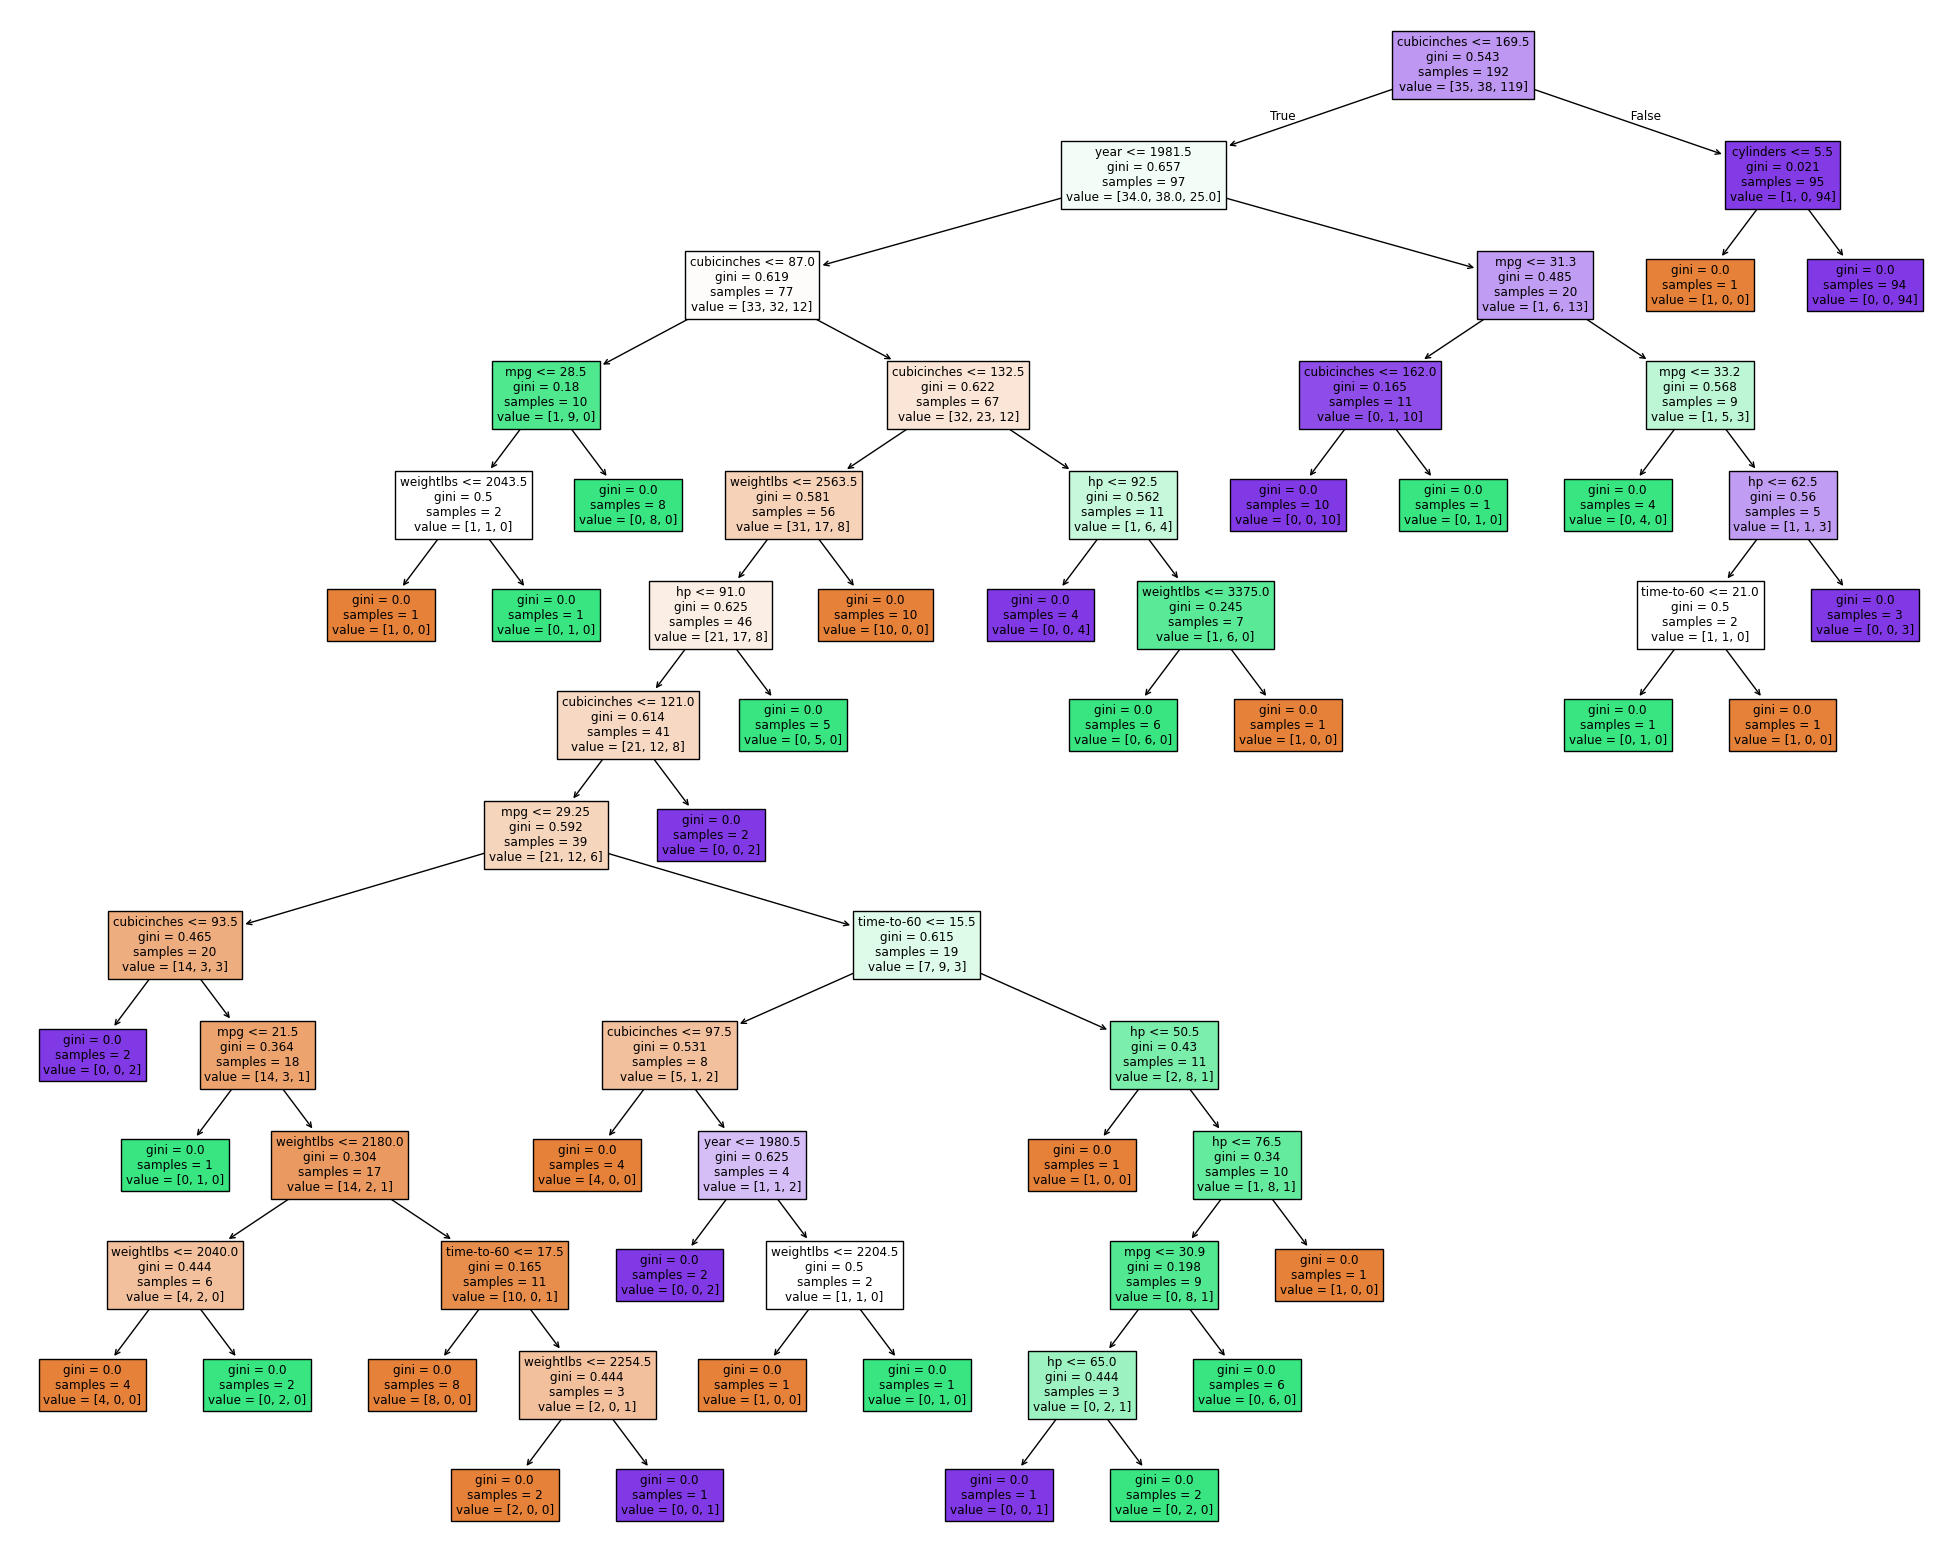

In [24]:
# Visualization (as in tutorial video)
import matplotlib.pyplot as plt 
from sklearn import tree

fig= plt.figure(figsize=(25,20))
tree.plot_tree(ct, filled=True, feature_names= X_train.columns);


b. What is the accuracy of the tree? (what proportion of the target values does it get right for the testing dataset?) (round to two decimals)  

In [25]:
# Create predictions and use accuracy measure that we learnt

from sklearn.metrics import accuracy_score
print("Test accuracy: ", accuracy_score(y_test, testPredictions))

Test accuracy:  0.828125


  c. Based on the classification matrix, how many European cars did you misclassify as Japanese cars? (the order of the classification matrix is: 'Europe', 'Japan', 'US'.)  

In [26]:
# Create ocnfusion matrix. Remember: Rows are actual values, columns are predictions
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, testPredictions))

[[ 7  2  3]
 [ 0 11  2]
 [ 1  3 35]]


Exercise 2

You really liked the decision tree you built for the previous task and you decide to use the dataset to build a system that predicts the miles per gallon (mpg) values for cars based on their characteristics. Since it would be relatively difficult to include categorical predictors into python`s system, you take out the “brand” variable and use only the continuous values for your model. (This has been done for you, the dataset you have to use is what you downloaded on the previous tab: cars_regression.csv.)

You decide to build a regression tree. Use the ‘mpg’ variable as your target variable.

In [30]:
# load data (remember to upload the datafile you downloaded from connect to colab)
data=pd.read_csv('cars_regression.csv')
data.head(5)

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350,165,4209,12,1972
1,31.9,4,89,71,1925,14,1980
2,17.0,8,302,140,3449,11,1971
3,15.0,8,400,150,3761,10,1971
4,30.5,4,98,63,2051,17,1978


Partition data sets into 75% training and 25% testing. Use the argument random_state = 45 to specify the random seed of 45 for data partitioning.

In [35]:
# split into training and testing data
X=data.drop('mpg', axis=1)
y=data['mpg']

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.25, random_state=45)


Create a full-grown decision tree (with random_state = 45 ) for this purpose and answer the following questions:

In [36]:
#Full grown means minimum split is 2 and no upper limit on max depth)
from sklearn.tree import DecisionTreeRegressor 

rt=DecisionTreeRegressor(max_depth=None, min_samples_split=2, random_state=45)
rt.fit(X_train, y_train)
testPredictions=rt.predict(X_test)


a. What is the root mean squared error for your predictions on the testing dataset? (round to two decimals)   

In [37]:
# Create predictions and use accuracy measure that we learnt (RMSE)
import numpy as np
from sklearn.metrics import mean_squared_error as MSE 


print("Test RMSE", MSE(y_test, testPredictions)**0.5)

Test RMSE 3.5077815282597062


b. What is correlation coefficient between your predictions and the target variable values in the testing dataset? (round to two decimals)   

In [38]:
# Create predictions and use accuracy measure that we learnt (corr)
testPredictions=rt.predict(X_test)
print("Test corr", np.corrcoef(y_test, testPredictions)[1,0])

Test corr 0.8635938377994761


c. What is the root mean squared error for your predictions on the testing dataset IF you limit the tree`s growth by limiting the depth of the tree to 5? (round to two decimals)  

In [40]:
# Redo previous steps, but limit the growth of the tree of 5 (max_depth = 5)

from sklearn.tree import DecisionTreeRegressor 

rt=DecisionTreeRegressor(max_depth=5, min_samples_split=2, random_state=45)
rt.fit(X_train, y_train)
testPredictions=rt.predict(X_test)

print("Test RMSE", MSE(y_test, testPredictions)**0.5)

Test RMSE 3.6122970018866614
